### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('Alzheimer')
target_result = pd.DataFrame.from_dict(target_query)

In [5]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q92542', 'xref_name': None, 'xre...",Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [6]:
selected_target1 = target_result.target_chembl_id[2]
selected_target1

'CHEMBL2094135'

In [7]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [8]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,306061,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,1.8
1,None,306062,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,0.9
2,None,307380,[],CHEMBL676871,In vitro inhibition of gamma secretase.,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,Gamma-secretase,9606,None,None,IC50,nM,UO_0000065,None,13.2


### Only Selecting the required Columns

In [9]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [10]:
df1_selected = df1[columns]

In [11]:
len(df1_selected)

3525

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [12]:
df1_selected.isnull().sum()

canonical_smiles       0
molecule_chembl_id     0
standard_value        30
dtype: int64

In [13]:
df1_selected['standard_value'].dtype

dtype('O')

In [14]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-14-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [15]:
df1_selected['standard_value'].dtype

dtype('float64')

In [16]:
df1_selected['standard_value'].head(3)

0     1.8
1     0.9
2    13.2
Name: standard_value, dtype: float64

In [17]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [19]:
len(df1_selected)

3525

In [20]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [21]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [22]:
df1_selected.describe()

,standard_value
count,3525.000000
mean,6061.182589
std,18931.277660
min,0.002000
25%,21.000000
50%,152.500000
75%,1884.000000
max,332000.000000


In [23]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-23-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [24]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-21-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-24-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [25]:
df1_selected['standard_value'].head()

0    8.091952
1    8.091947
2    8.103505
3    8.091947
4    5.724919
Name: standard_value, dtype: float64

In [26]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [27]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [28]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [29]:
len(df1_x),len(df1_y)

(3525, 3525)

In [30]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('alzheimer_labels.csv',index=False)

### A quick look at files

In [31]:
! ls

alzheimer_labels.csv  molecule.smi  sample_data


In [32]:
! cat molecule.smi | head -5

C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3c(c2)OCO3)c2ccccc2NC1=O	CHEMBL336071
C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3c(c2)OCO3)c2ccccc2N(CCO)C1=O	CHEMBL336813
C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3c(c2)OCO3)c2ccccc2N(CC(N)=O)C1=O	CHEMBL334594
C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3c(=O)ccoc3c2)c2ccccc2N(C)C1=O	CHEMBL133237
C[C@@H](Cc1ccc(F)c(F)c1)C(=O)N[C@H]1N=C(c2ccc3c(c2)CCN(C)C3=O)c2ccccc2N(C)C1=O	CHEMBL132900


### Using padel Descriptor to break it into dataset form

In [33]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-09 16:29:51--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-09 16:29:51--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-03-09 16:29:52 (221 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-09 16:29:52--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL336071 in molecule.smi (1/3525). 
Processing CHEMBL336813 in molecule.smi (2/3525). 
Processing CHEMBL334594 in molecule.smi (3/3525). Average speed: 9.98 s/mol.
Processing CHEMBL133237 in molecule.smi (4/3525). Average speed: 5.07 s/mol.
Processing CHEMBL423533 in molecule.smi (6/3525). Average speed: 3.11 s/mol.
Processing CHEMBL132900 in molecule.smi (5/3525). Average speed: 4.06 s/mol.
Processing CHEMBL133857 in molecule.smi (7/3525). Average speed: 2.71 s/mol.
Processing CHEMBL133235 in molecule.smi (8/3525). Average speed: 2.31 s/mol.
Processing CHEMBL130093 in molecule.smi (9/3525). Average speed: 2.08 s/mol.
Processing CHEMBL133746 in molecule.smi (10/3525). Average speed: 1.86 s/mol.
Processing CHEMBL335184 in molecule.smi (11/3525). Average speed: 1.72 s/mol.
Processing CHEMBL341256 in molecule.smi (12/3525). Average speed: 1.58 s/mol.
Processing CHEMBL337670 in molecule.smi (14/3525). Average speed: 1.40 s/mol.
Processing CHEMBL134124 in molecule.smi (13/352

### Model selection and usage

### Importing Modules

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [37]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('alzheimer_labels.csv')

In [38]:
Y['standard_value'].isnull().sum()

0

In [39]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [40]:
Y.standard_value.unique()

array([ 8.09,  8.1 ,  5.72,  9.31,  7.  ,  8.26,  6.34,  5.77,  8.08,
        6.39,  8.25,  8.33,  6.21,  6.47,  6.82,  6.5 ,  6.62,  6.49,
        8.16,  8.2 ,  6.14,  8.21,  8.17,  8.18,  6.27,  7.13,  5.46,
        6.04,  5.36,  5.61,  6.41,  6.6 ,  8.15,  6.37,  8.07,  8.01,
        8.04,  9.6 ,  8.02,  8.12,  8.11,  7.67, 10.4 ,  8.86,  8.93,
        5.31,  4.86,  8.29,  4.47,  8.31,  8.28,  5.13,  8.27,  4.99,
        7.11,  5.79,  8.19,  5.32,  4.81,  5.19,  8.24,  4.97,  7.9 ,
        7.02,  7.35,  7.19,  7.46,  7.58,  7.37,  7.8 ,  7.2 ,  7.29,
        7.43,  7.7 ,  7.56,  7.03,  7.97,  8.13,  7.53,  7.3 ,  8.94,
        9.96,  9.37,  7.09,  8.  , 10.3 ,  7.87, 10.12, 10.82, 11.7 ,
       10.62, 10.38, 10.43, 10.7 , 10.05,  4.41,  5.03,  4.8 ,  5.11,
        8.35,  5.96,  6.66,  6.59,  6.2 ,  6.52,  5.78,  6.3 ,  6.76,
        5.53,  5.35,  7.81,  6.78,  7.44,  7.57,  8.06,  7.61,  6.81,
        7.54,  6.92,  6.79,  4.71,  5.41,  8.23,  8.14,  6.08,  7.94,
        7.31,  6.51,

In [41]:
Y.describe()

,standard_value
count,3525.000000
mean,7.790874
std,0.891772
min,3.480000
25%,8.090000
50%,8.090000
75%,8.090000
max,11.700000


In [42]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [43]:
X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y[:5]

array([8.09, 8.09, 8.1 , 8.09, 5.72])

In [45]:
X.shape

(3525, 881)

### Defining all the Regressors

In [46]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [47]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [48]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.08279896582496349

Mean Sqaured Error : 0.830910937142713

Mean Absolute Error : 0.5002217675964674

Root Mean Squared : 0.9115431625231539


### Decision Tree Regressor

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.5446114459227058

Mean Sqaured Error : 1.185293470496781

Mean Absolute Error : 0.5476491886101821

Root Mean Squared : 1.088711839972718


### Support Vector Regressor

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.02476712698460748

Mean Sqaured Error : 0.7863788576738175

Mean Absolute Error : 0.38390672925947267

Root Mean Squared : 0.886780050335943


### Extra Tree Regression

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.431842007916458

Mean Sqaured Error : 1.0987572228901543

Mean Absolute Error : 0.5363556080630705

Root Mean Squared : 1.048216209992077


### Lasso Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.00022095329639570949

Mean Sqaured Error : 0.7675427811478295

Mean Absolute Error : 0.5500857300940593

Root Mean Squared : 0.8760951895472486


### Ridge Regression

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.05725831573985207

Mean Sqaured Error : 0.7234347289529335

Mean Absolute Error : 0.5426301223519961

Root Mean Squared : 0.8505496628374698


### Orthogonal Matching Pursuit Regressor

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.0910021533483023

Mean Sqaured Error : 0.697540611378978

Mean Absolute Error : 0.5306243346107581

Root Mean Squared : 0.8351889674672301


### Linear Regression

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -1.0855828547169211e+21

Mean Sqaured Error : 8.330472189467461e+20

Mean Absolute Error : 1563802477.4068663

Root Mean Squared : 28862557387.500263


### Model Performance

In [57]:
import seaborn as sns

In [58]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [59]:
model_performance = pd.DataFrame.from_dict(di)

In [60]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,9.115432e-01,-8.279897e-02
1,Decision Tree,1.088712e+00,-5.446114e-01
2,Support Vector,8.867801e-01,-2.476713e-02
3,Extra Tree,1.048216e+00,-4.318420e-01
4,Lasso,8.760952e-01,-2.209533e-04
5,Ridge,8.505497e-01,5.725832e-02
6,Orthogonal,8.351890e-01,9.100215e-02
7,Linear,2.886256e+10,-1.085583e+21


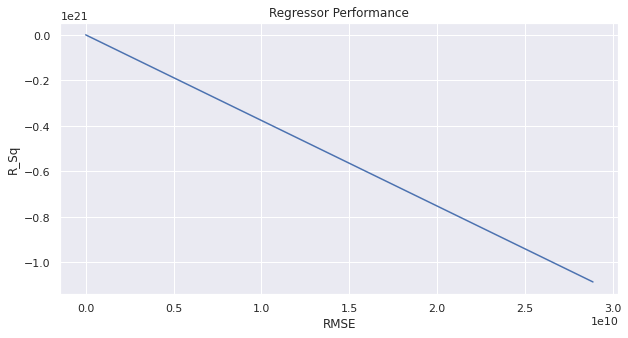

In [61]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [66]:
rmse

0.8351889674672301

### Saving model state for later use

In [67]:
import pickle

pickle.dump(svr,open("alzheimer_model.pkl","wb"))